In [1]:
import sys
!{sys.executable} -m pip install numpy==1.24.3 --force-reinstall


Defaulting to user installation because normal site-packages is not writeable
  Obtaining dependency information for numpy==1.24.3 from https://files.pythonhosted.org/packages/f0/e8/1ea9adebdccaadfc208c7517e09f5145ed5a73069779ff436393085d47a2/numpy-1.24.3-cp311-cp311-win_amd64.whl.metadata
  Using cached numpy-1.24.3-cp311-cp311-win_amd64.whl.metadata (5.6 kB)
Using cached numpy-1.24.3-cp311-cp311-win_amd64.whl (14.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\VEDANT\\AppData\\Roaming\\Python\\Python311\\site-packages\\~~mpy\\.libs\\libopenblas64__v0.3.21-gcc_10_3_0.dll'
Check the permissions.



In [2]:
!pip install --upgrade bottleneck


Defaulting to user installation because normal site-packages is not writeable


In [3]:
# --- Step 1: Import Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [4]:
# --- Step 2: Load Data ---
admissions = pd.read_csv("admissions.csv")
fatalities = pd.read_csv("fatalities.csv")
metrics = pd.read_csv("metrics.csv")
prescriptions = pd.read_csv("prescriptions.csv")
smokers = pd.read_csv("smokers.csv")


In [5]:
# --- Step 3: Data Preprocessing ---
# Clean admissions and fatalities
def clean_health_data(df):
    df['Value'] = pd.to_numeric(df['Value'], errors='coerce')
    df['Year'] = df['Year'].astype(str).str.extract(r'(\d{4})')
    df = df.dropna(subset=['Year'])  # remove rows with missing years
    df['Year'] = df['Year'].astype(int)
    return df

admissions = clean_health_data(admissions)
fatalities = clean_health_data(fatalities)

# Clean metrics data
metrics.columns = [col.strip().replace('\n', ' ') for col in metrics.columns]
metrics.rename(columns=lambda x: x.strip(), inplace=True)

# Clean prescriptions
df_year_extract = prescriptions['Year'].astype(str).str.extract(r'(\d{4})')
prescriptions['Year'] = pd.to_numeric(df_year_extract[0], errors='coerce')

# Clean smokers
df_year_extract = smokers['Year'].astype(str).str.extract(r'(\d{4})')
smokers['Year'] = pd.to_numeric(df_year_extract[0], errors='coerce')
smokers['Sex'] = smokers['Sex'].fillna('All')


In [6]:
# --- Step 3: Data Integration ---
# Filter fatalities for all deaths
merged = fatalities[fatalities['Diagnosis Type'] == 'All deaths']
merged = merged[['Year', 'Value']].groupby('Year').sum().reset_index()
merged.rename(columns={'Value': 'Total_Deaths'}, inplace=True)

# Smoking rate average
smokers['Avg_Smoking_Rate'] = smokers.iloc[:, 3:].mean(axis=1)
smoking_summary = smokers[smokers['Sex'] == 'All'][['Year', 'Avg_Smoking_Rate']]
merged = pd.merge(merged, smoking_summary, on='Year', how='left')

# Merge metrics
merged = pd.merge(merged, metrics, on='Year', how='left')

# Merge prescriptions summary
presc_summary = prescriptions[['Year', 'All Pharmacotherapy Prescriptions']]
merged = pd.merge(merged, presc_summary, on='Year', how='left')

# Drop missing values
merged.dropna(inplace=True)


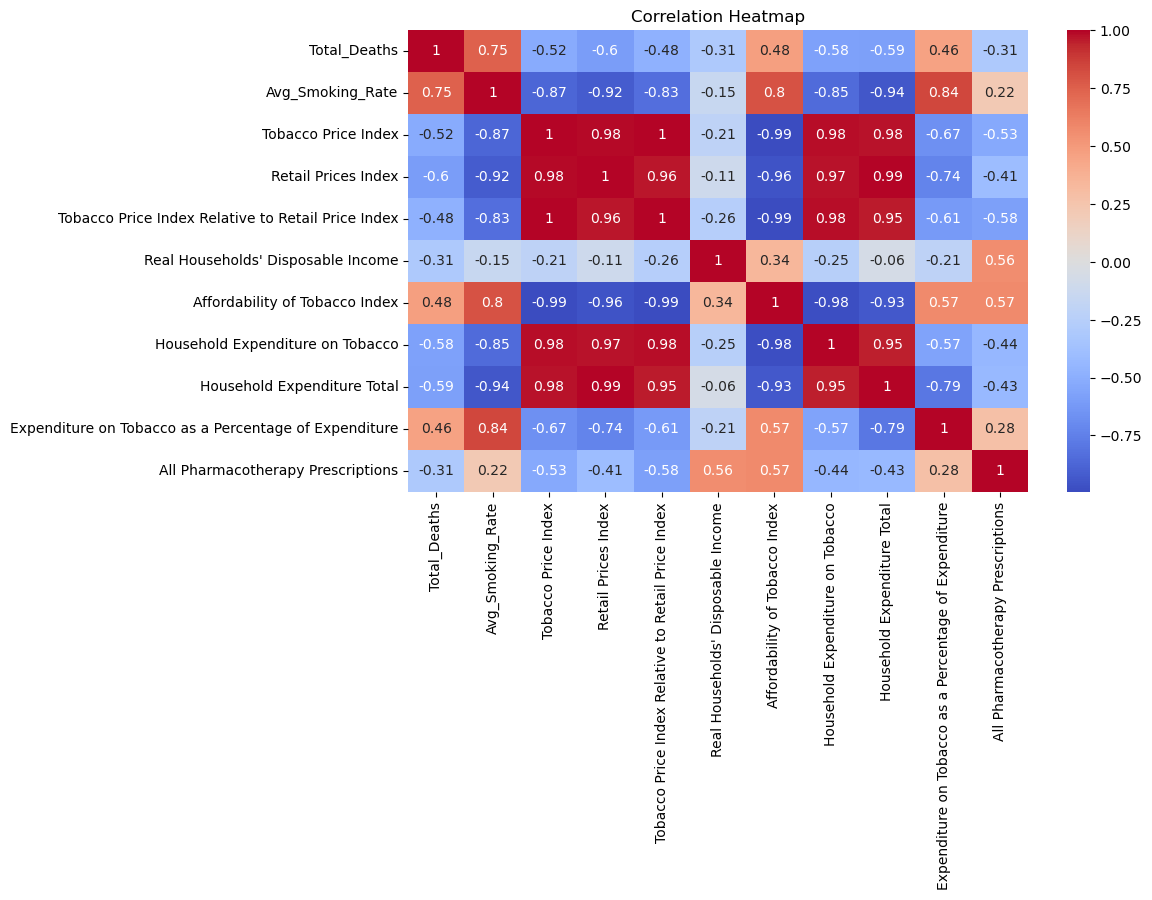

In [7]:

# --- Step 4: Exploratory Data Analysis ---
plt.figure(figsize=(10, 6))
sns.heatmap(merged.drop(columns='Year').corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [9]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

models = {
    'LinearRegression': LinearRegression(),
    'RandomForest': RandomForestRegressor(random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    results[name] = {
        'R2': r2_score(y_test, preds),
        'RMSE': np.sqrt(mean_squared_error(y_test, preds))  # <- updated line
    }

print("\n--- Model Evaluation Results ---")
for name, metrics in results.items():
    print(f"{name}: R2 = {metrics['R2']:.3f}, RMSE = {metrics['RMSE']:.2f}")



--- Model Evaluation Results ---
LinearRegression: R2 = -1.143, RMSE = 34155.51
RandomForest: R2 = 0.270, RMSE = 19934.47


In [10]:
!pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable


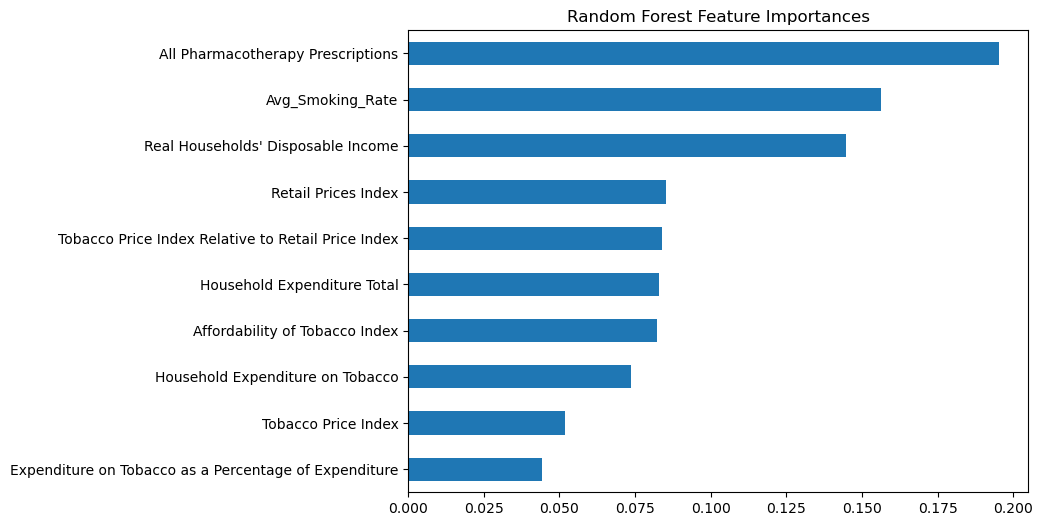

In [11]:
# --- Step 7: Model Interpretation (Feature Importance) ---
rf_model = models['RandomForest']
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=True).plot(kind='barh', figsize=(8,6))
plt.title("Random Forest Feature Importances")
plt.show()

In [12]:
# --- Step 8 to 10: Deployment Planning ---
print("\nDeployment Options:")
print("1. Use Flask/FastAPI to expose model via API endpoint.")
print("2. Use Streamlit/Dash to create an interactive dashboard.")
print("3. Schedule periodic retraining with updated data.")

print("\nDocumentation:")
print("- Save this notebook as PDF or HTML for submission.")
print("- Include feature definitions, assumptions, and data sources in the report.")


Deployment Options:
1. Use Flask/FastAPI to expose model via API endpoint.
2. Use Streamlit/Dash to create an interactive dashboard.
3. Schedule periodic retraining with updated data.

Documentation:
- Save this notebook as PDF or HTML for submission.
- Include feature definitions, assumptions, and data sources in the report.


In [13]:
pip install shap


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


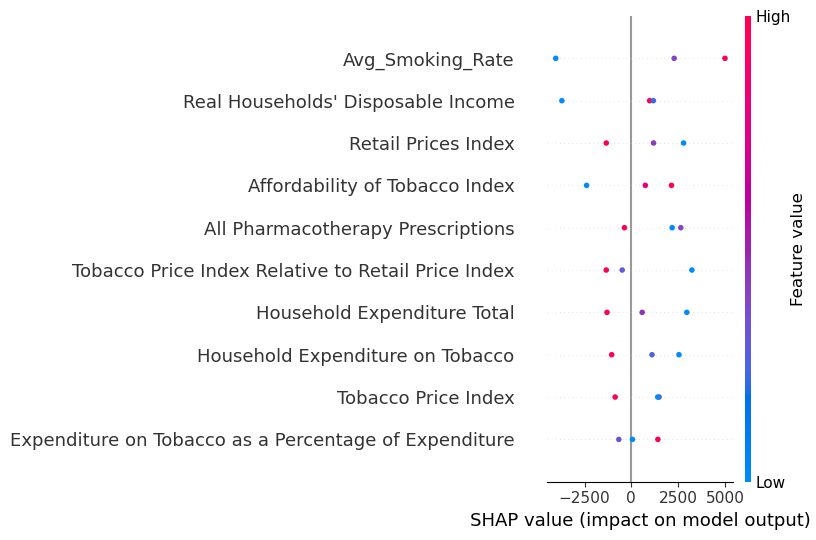

In [14]:
import shap

# Only works with tree-based models like RandomForest
explainer = shap.TreeExplainer(rf_model)  # Use your trained RandomForestRegressor
shap_values = explainer.shap_values(X_test)

# Visualize feature impacts
shap.summary_plot(shap_values, X_test, feature_names=X.columns)


In [15]:
import joblib
joblib.dump(rf_model, "rf_model.pkl")


['rf_model.pkl']

In [16]:
import os
os.getcwd()


'C:\\Users\\VEDANT'

In [17]:
import sklearn
print(sklearn.__version__)  # It should say 1.6.1


1.7.0


In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import joblib

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

joblib.dump(rf_model, "rf_model.pkl")
print("✅ Model trained and saved with scikit-learn 1.7.0")


✅ Model trained and saved with scikit-learn 1.7.0


In [19]:
import joblib
joblib.dump(rf_model, 'tobacco_model.pkl')


['tobacco_model.pkl']

In [20]:
print(X.columns.tolist())


['Avg_Smoking_Rate', 'Tobacco Price Index', 'Retail Prices Index', 'Tobacco Price Index Relative to Retail Price Index', "Real Households' Disposable Income", 'Affordability of Tobacco Index', 'Household Expenditure on Tobacco', 'Household Expenditure Total', 'Expenditure on Tobacco as a Percentage of Expenditure', 'All Pharmacotherapy Prescriptions']
